<a href="https://colab.research.google.com/github/radonix/urban-octo-winner/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [5]:
def func_unid_deg(x):
  return np.where( x > 0, 1, 0)


class perceptron:
    def __init__(self,taxa_de_aprendizado=0.01,iter=1000):
       self.tda = taxa_de_aprendizado
       self.iter = iter
       self.func_ativ = func_unid_deg
    def fit(self,x,y):
       n_samples,n_features = x.shape
       self.pesos = np.zeros(n_features)
       self.vies = 0 
       y = np.where(y > 0, 1, 0)
       for _ in range(self.iter):
         for idx,x_i in enumerate(x):
             linear_output = np.dot(x_i,self.pesos) + self.vies
             y_predito = self.func_ativ(linear_output)
             atualizar = self.tda*(y[idx]-y_predito)
             self.pesos += atualizar*x_i
             self.vies += atualizar
    def predizer(self,x):
      linear_output=np.dot(x,self.pesos)+self.vies
      y_predito = self.func_ativ(linear_output)
      return y_predito

In [6]:
if __name__ == "__main__":
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from sklearn import datasets
def precisao(y_true,y_pred):
  precisao = np.sum(y_true == y_pred)/len(y_true)
  return precisao
x,y = datasets.make_blobs(
    n_samples = 150, n_features = 2,centers = 2,cluster_std=1.05,random_state=2
)
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.2,random_state=123
)
p = perceptron(taxa_de_aprendizado=0.01,iter = 1000)
p.fit(x_train,y_train)
predicoes = p.predizer(x_test)

Precisão da classificacao do perceptron 1.0


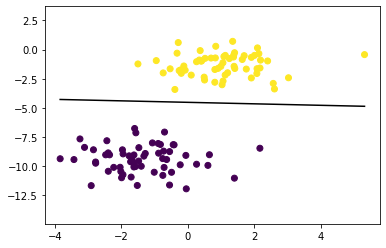

In [8]:
print("Precisão da classificacao do perceptron",precisao(y_test,predicoes))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(x_train[:,0],x_train[:,1],marker="o",c=y_train)

x0_1 = np.amin(x_train[:,0])
x0_2 = np.amax(x_train[:,0])

x1_1 = (-p.pesos[0]*x0_1-p.vies/p.pesos[1])
x1_2 = (-p.pesos[0]*x0_2-p.vies/p.pesos[1])

ax.plot([x0_1,x0_2],[x1_1,x1_2],"k")

ymin = np.amin(x_train[:,1])
ymax = np.amax(x_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()